## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [2]:
from sklearn.datasets import make_classification

In [46]:
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90],random_state=12,n_redundant=0)

In [47]:
x,y

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [48]:
import pandas as pd

In [53]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])

In [54]:
df1

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
995,-0.712495,-0.880452
996,-2.625830,-2.827891
997,-1.326439,-1.815178
998,-0.833486,-0.514647


In [55]:
df2

,target
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [56]:
df=pd.concat([df1,df2],axis=1)

In [57]:
df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [58]:
df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [59]:
df['target'].value_counts() #Imbaance Dataset

0    900
1    100
Name: target, dtype: int64

In [62]:
df.describe()

,f1,f2,target
count,1000.000000,1000.000000,1000.00000
mean,-0.993721,-0.772539,0.10000
std,0.541078,0.977820,0.30015
min,-2.761014,-3.367327,0.00000
25%,-1.362567,-1.390400,0.00000
50%,-1.001817,-0.856420,0.00000
75%,-0.622472,-0.227821,0.00000
max,0.888985,2.749786,1.00000


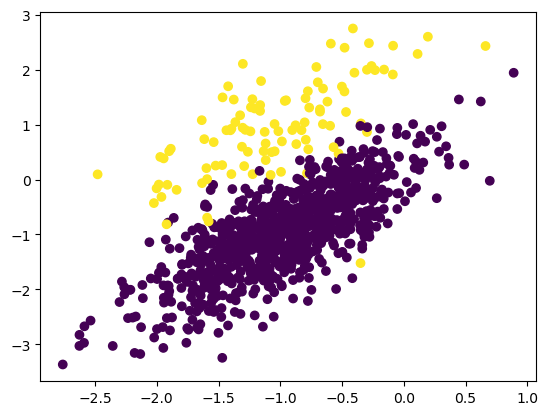

In [60]:
import matplotlib.pyplot as plt
plt.scatter(df['f1'],df['f2'],c=df['target'])

In [23]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 4.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [64]:
from imblearn.over_sampling import SMOTE

In [69]:
#Transform rge dataset
oversampling =SMOTE()
x,y=oversampling.fit_resample(df[['f1','f2']],df['target'])

In [70]:
x.shape

(1800, 2)

In [71]:
y.shape

(1800,)

In [72]:
y.value_counts()

0    900
1    900
Name: target, dtype: int64

In [73]:
x.count()

f1    1800
f2    1800
dtype: int64

In [74]:
x

,f1,f2
0,-0.762898,-0.706808
1,-1.075436,-1.051162
2,-0.610115,-0.909802
3,-2.023284,-0.428945
4,-0.812921,-1.316206
...,...,...
1795,-0.679207,1.262971
1796,-0.244371,1.928281
1797,-0.697117,1.017473
1798,-0.710262,1.331404


In [75]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1795    1
1796    1
1797    1
1798    1
1799    1
Name: target, Length: 1800, dtype: int64

In [76]:
x.describe()

,f1,f2
count,1800.000000,1800.000000
mean,-1.013003,-0.009390
std,0.543083,1.242483
min,-2.761014,-3.367327
25%,-1.381069,-0.954185
50%,-1.026936,-0.007761
75%,-0.640362,0.934443
max,0.888985,2.749786


In [78]:
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

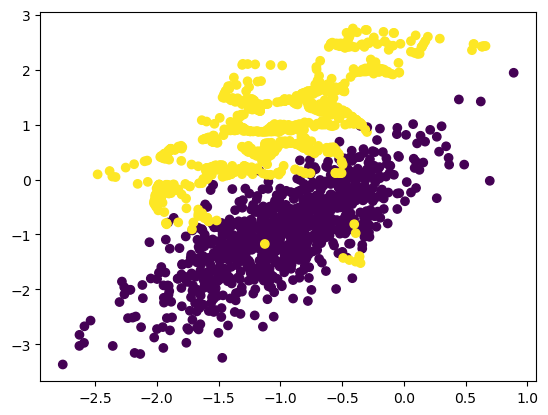

In [79]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])